In [9]:
#!git clone https://github.com/lucas-noblat/GerOndApp.git

#import sys

#sys.path.append('/content/GerOndApp/APP')


import functions as fc
import scipy.signal


## Gerando sinais

In [10]:
# Número de amostras por segundo

t_amostragem = 1000

- **Senoidal**

<StemContainer object of 3 artists>

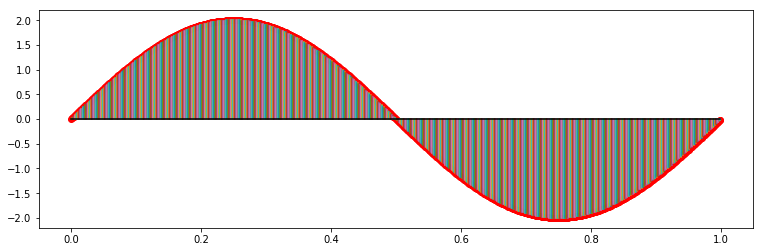

In [11]:
# Criando sinal

vetor_tempo, s_senoidal = fc.sinal_senoidal(amplitude=2, frequencia=1, taxa_amostragem= t_amostragem)

# Plottando

#fc.plotar(vetor_tempo, s_senoidal, nome='Sinal senodial', largura=1280, altura=400, legenda=f'{t_amostragem} amostras por segundo')

fc.plt.figure(figsize=(12.8, 4.0))
fc.plt.stem(vetor_tempo, s_senoidal, linefmt='-', markerfmt='ro', basefmt='-k')


- **Triangular**

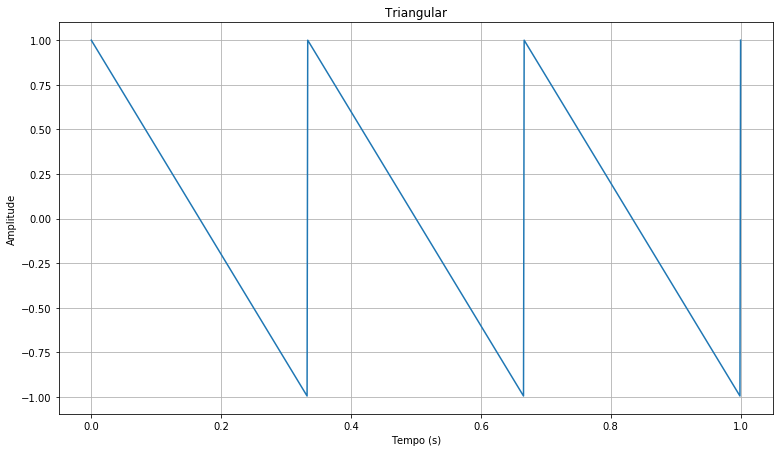

In [12]:
# Gerando sinal e vetor X

vetor_tempo, sinal_triangular = fc.sinal_triangular(amplitude=1, frequencia=3)

# Plotando

fc.plotar(vetor_tempo, sinal_triangular, nome='Triangular')

- **Quadrada**

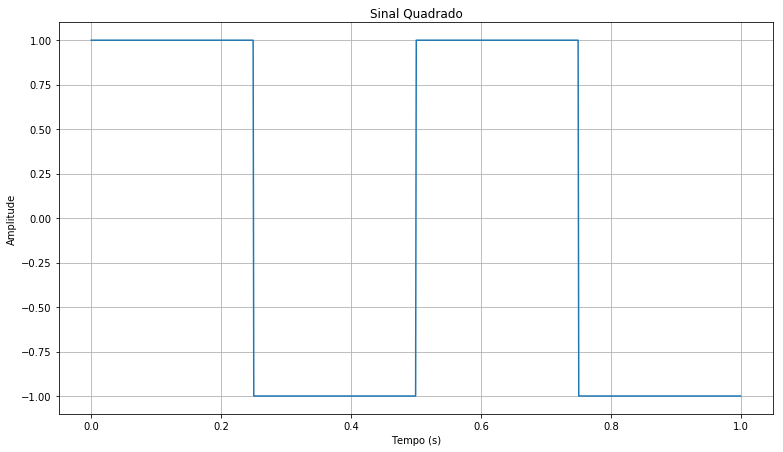

In [13]:
# Gerando
x, sinal_quadrado = fc.sinal_quadrado(amplitude=1, frequencia=2)

# Plotando

fc.plotar(x, sinal_quadrado, nome = 'Sinal Quadrado')

- **Ruído Branco**

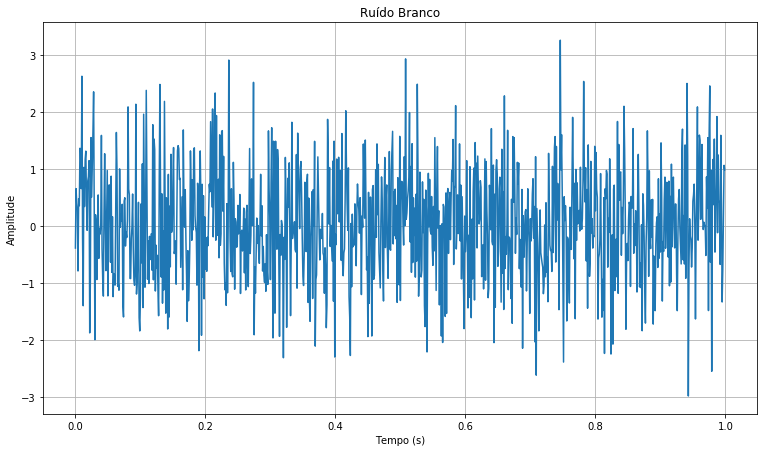

In [15]:
# Gerando

x, ruido_branco = fc.ruido_branco(amplitude=1, freq_inicial=0,freq_final=1,num_componentes=1000, duracao=1)

# Plotando

fc.plotar(x, ruido_branco, 'Ruído Branco', salvar_como='Ruido Branco')